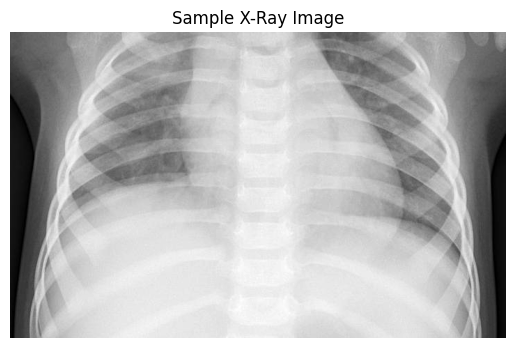

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Load image (make sure path is correct)
image_path = r"C:\Users\Suraj\Desktop\Medical_Image_Analysis\archive\chest_xray\train\PNEUMONIA\person1_bacteria_1.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Show image
if image is None:
    print("Error loading image.")
else:
    plt.imshow(image, cmap='gray')
    plt.title("Sample X-Ray Image")
    plt.axis('off')
    plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load images
train_data = datagen.flow_from_directory(
    r"C:\Users\Suraj\Desktop\Medical_Image_Analysis\archive\chest_xray\train",
    target_size=(256, 256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    r"C:\Users\Suraj\Desktop\Medical_Image_Analysis\archive\chest_xray\val",
    target_size=(256, 256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_data, epochs=10, validation_data=val_data)
model.save("medical_ai_model.h5")  # Save for deployment


C:\Users\Suraj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Suraj\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.7725 - loss: 0.8370 - val_accuracy: 0.7500 - val_loss: 0.7785
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.8840 - loss: 0.2913 - val_accuracy: 0.6875 - val_loss: 0.9808
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - accuracy: 0.9051 - loss: 0.2387 - val_accuracy: 0.7500 - val_loss: 0.6017
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9061 - loss: 0.2350 - val_accuracy: 0.6875 - val_loss: 0.5810
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.9230 - loss: 0.2077 - val_accuracy: 0.6250 - val_loss: 0.9289
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9193 - loss: 0.2069 - val_accuracy: 0.5625 - val_loss: 0.6878
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9233 - loss: 0.2100 - val_accuracy: 0.6875 - val_loss: 0.5118
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9290 - loss: 0.1833 - val_accu

In [7]:
#phase 5
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Load test data
test_data = datagen.flow_from_directory(
    r"C:\Users\Suraj\Desktop\Medical_Image_Analysis\archive\chest_xray\test",
    target_size=(256, 256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Predict
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step
Accuracy: 78.21%
Confusion Matrix:
 [[103 131]
 [  5 385]]
